In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import joblib
from sklearn.model_selection import train_test_split


In [3]:
# data = pd.read_csv('https://raw.githubusercontent.com/HendersonAlec2212/project_04/main/csv/PICKUP_DATA_CLEAN.csv', low_memory=False)
df = pd.read_csv('../csv/PICKUP_DATA_CLEAN.csv')

In [4]:
df.head()

,brandName,modelName,vf_ModelID,vf_ModelYear,mileage,askPrice,msrp,color,vf_EngineCylinders,vf_FuelTypePrimary,vin
0,FORD,F-250,1805.0,2017.0,19106,40962,40962,Ingot Silver Metallic,8.0,Diesel,bcd4bbecbba3b9ed2330d543abc3d90b997aa8fa6e628d...
1,FORD,F-150,1801.0,2017.0,28194,28962,28962,Ingot Silver Metallic,6.0,Gasoline,a8f09496d9523e33ee3a8f885a475f5ef001d68a334c98...
2,GMC,Sierra,1857.0,2017.0,7483,43962,43962,Crimson Red Tintcoat,8.0,Gasoline,c65dd3e96f4f68a0d4c7b09005273e0312295057c7c529...
3,FORD,F-250,1805.0,2017.0,23881,38962,38962,Oxford White,8.0,Diesel,966168515802a7cf510d6c87a15cf71cc4385316a504c6...
4,GMC,Canyon,4093.0,2017.0,6333,30962,30962,Onyx Black,6.0,Gasoline,9c7648c843035d0b46e9d716d947dfa3d0e8881054247a...


In [5]:
depth = 6

In [6]:
model_results = {}
train_score_list = []
test_score_list = []
df_test = df.drop(columns=['msrp','vin'])
#names for each DF/ Model to be trained


# divide the data
X = df_test.drop(columns=['askPrice'])
y = df_test['askPrice']

# set dummies
X_dummies = pd.get_dummies(X,drop_first=True)

# split for test and train
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=42)

# model parameters
model = RandomForestRegressor(max_depth=depth,n_estimators=100, random_state=12)

# fit the model to the data
model.fit(X_train, y_train)

# evaluate scores and predictions
train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

train_score = model.score(X_train,y_train,sample_weight=None)
test_score = model.score(X_test,y_test,sample_weight=None)

# record results

model_results['model'] = model

model_results['train_y_pred'] = train_predicted
model_results['test_y_pred'] = test_predicted

model_results['train_score']  = train_score
model_results['test_score']  = test_score

train_score_list.append(train_score)
test_score_list.append(test_score)


In [7]:
model_results

{'model': RandomForestRegressor(max_depth=6, random_state=12),
 'train_y_pred': array([34545.67019555, 27239.58670109, 17487.79257515, ...,
        30857.10321698, 31176.98244571, 32717.764775  ]),
 'test_y_pred': array([34652.9091463 , 28248.29796945, 34652.9091463 , ...,
        22996.22635559, 23797.16908988,  9277.43307169]),
 'train_score': 0.7860678685814179,
 'test_score': 0.7711277155051416}

In [15]:
from os import getcwd
getcwd()

'C:\\Users\\Alec\\Documents\\Programming_Resources\\Boot_Camp\\project-04\\CISautoData\\models'

In [16]:
# save the model
model = model_results['model']
joblib.dump(model,'trucks_depth_6_77.joblib')

['trucks_depth_6_77.joblib']

In [8]:
feature_importances = model.feature_importances_

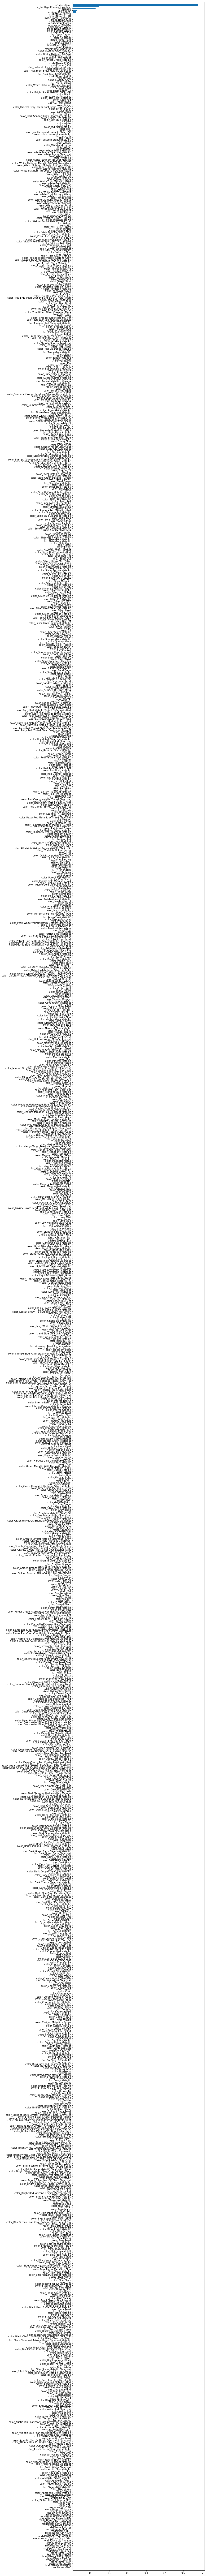

In [11]:
features = sorted(zip(X_dummies.columns, model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()